In [1]:
import numpy as np
import time
from util import *
from scipy.optimize import minimize, basinhopping
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
A,B,S = definition_constantes()
d=B.shape[0]
x0 = np.ones((d,))

### 1.1 OPTIMISATION SANS CONTRAINTES

#### 1.1.1 Méthode du gradient

_a)_

In [3]:
range_rho = [10**(-n) for n in range(-1, 8)]

In [4]:
# On teste la méthode du gradient avec plusieurs valeurs de rho
datf=pd.DataFrame()
for rho in range_rho:
    print("Rho =  " + str(rho))
    debut = time.time()
    GradResults=gradient_rho_constant(f1,df1,x0,rho=rho,tol=1e-6,args=(B,S))
    datf=datf.append(GradResults,ignore_index=True)
    tps_ecoule = time.time()-debut
    print('tps écoulé (gradient_rho_constant):',tps_ecoule)
    print(GradResults['minimum'])
    print("Nr iteration : ", GradResults['iterations'])
    print("Nr appels fonction de coût : ", GradResults['calls'])
    print("--------------------")

fig, ax1 = plt.subplots()
ax1.scatter(np.log(range_rho)/np.log(10),datf['calls'],linewidth=4.0,marker='.')
color = 'tab:red'
ax1.set_xlabel('log rho')
ax1.set_ylabel('Nr appels fonction de coût')
ax1.legend(['Nr appels'],loc=4)
ax2 = ax1.twinx()
ax2.scatter(np.log(range_rho)/np.log(10),datf['f_minimum'],color=color,linewidth=2.0,marker='.')
ax2.set_ylabel('f minimum')
ax2.legend(['f mini'],loc=7)

Rho =  10


/Users/dieze/Documents/OMA/OPT/tp/continuous_discrete_optimization/tp1/util.py:203: RuntimeWarning: invalid value encountered in subtract
  xnp1=xn-rho*dfx             # nouveau point courant (x_{n+1})


tps écoulé (gradient_rho_constant): 0.6644599437713623
[nan nan nan nan nan]
Nr iteration :  10000
Nr appels fonction de coût :  10000
--------------------
Rho =  1
tps écoulé (gradient_rho_constant): 0.6344959735870361
[nan nan nan nan nan]
Nr iteration :  10000
Nr appels fonction de coût :  10000
--------------------
Rho =  0.1
tps écoulé (gradient_rho_constant): 0.6325356960296631
[nan nan nan nan nan]
Nr iteration :  10000
Nr appels fonction de coût :  10000
--------------------
Rho =  0.01
tps écoulé (gradient_rho_constant): 0.05005383491516113
[-0.68823504  0.15332241 -0.61439915  0.48960858 -0.04326259]
Nr iteration :  641
Nr appels fonction de coût :  641
--------------------
Rho =  0.001
tps écoulé (gradient_rho_constant): 0.28641414642333984
[-0.67112026  0.14320469 -0.61511994  0.47965764 -0.02088116]
Nr iteration :  4742
Nr appels fonction de coût :  4742
--------------------
Rho =  0.0001
tps écoulé (gradient_rho_constant): 0.666860818862915
[-0.35293621 -0.02639045 -0.606

- Pour $\rho\geq 0.1$, l'algorithme ne converge pas car le pas est trop grand: avec ce pas trop agressif on s'éloigne rapidement du minimum.
- Pour $\rho\leq 10^{-4}$, l'algorithme converge toujours mais plus lentement car le pas est trop petit. On atteint alors le nombre max d'itération et l'algorithme s'arrête sur un point n'étant pas le minimum (flagrant pour $\rho= 10^{-7}$ pour lequel le vecteur obtenu est très proche du vecteur d'initialisation)
- Le nombre d'itération et d'appel à $f$ est minimal pour $\rho=0.01$  (voir Graphique précédent)

Essayons de trouver quel  $\rho$ minimum permet à l'agorithme de converger


In [5]:
# rho minimum permettant à l'algo de converger
results=[]
for rho in range(1,10):
    rho=0.01*rho
    results+=['(rho=%s,converged=%s)'%(rho,gradient_rho_constant(f1,df1,x0,rho=rho,tol=1e-6,args=(B,S))['converged'])]
results

/Users/dieze/Documents/OMA/OPT/tp/continuous_discrete_optimization/tp1/util.py:203: RuntimeWarning: invalid value encountered in subtract
  xnp1=xn-rho*dfx             # nouveau point courant (x_{n+1})
/Users/dieze/Documents/OMA/OPT/tp/continuous_discrete_optimization/tp1/util.py:48: RuntimeWarning: invalid value encountered in subtract
  fU = np.transpose(U) * S * U - np.transpose(B) * U;


['(rho=0.01,converged=True)',
 '(rho=0.02,converged=True)',
 '(rho=0.03,converged=False)',
 '(rho=0.04,converged=False)',
 '(rho=0.05,converged=False)',
 '(rho=0.06,converged=False)',
 '(rho=0.07,converged=False)',
 '(rho=0.08,converged=False)',
 '(rho=0.09,converged=False)']

Ainsi, on voit que l'algorithme converge pour un $\rho$ compris entre 0,02 et 0,03 pour une initialisation à 1

_b)_

A chaque étape, si $f(x_{n+1})\geq f(x_{n})$, on divise $\rho$ par 2 pour réduire le pas. Au contraire, si $f(x_{n+1})<f(x_{n})$, on essaye de multiplier le pas par 2 pour avancer plus vite à la prochaine itération, quitte à devoir le rediviser par 2

_c)_

L'algorithme du gradient à rho adaptatif est à trouver dans le util.py

In [6]:
# On teste la convergence de la méthode du gradient à rho adaptatif avec plusieurs valeurs de rho
rho_0 = 100 # pas initial
debut = time.time()
GradResults=gradient_rho_adaptatif(f1,df1,x0,rho=rho_0,tol=1e-6,args=(B,S))
tps_ecoule = time.time()-debut
print('rho=100')
print('tps écoulé (gradient_rho_adaptatif):',tps_ecoule)
print(GradResults['minimum'])
print("Nr iteration : ", GradResults['iterations'])
print("Nr appels fonction de coût : ", GradResults['calls'])
print("--------------------")

# Comparer le temps écoulé et le nombre d'itérations pour un rho où les 2 méthodes convergent
rho=0.001
mean_time=0
mean_time_ada=0

for i in range(100):
    debut = time.time()
    GradResults1=gradient_rho_adaptatif(f1,df1,x0,rho=rho,tol=1e-6,args=(B,S))
    mean_time_ada += time.time()-debut

    debut = time.time()
    GradResults2=gradient_rho_constant(f1,df1,x0,rho=rho,tol=1e-6,args=(B,S))
    mean_time += time.time()-debut

print('rho=0.001')

print('Méthode rho adaptatif : temps écoulé moyen=%ss , nombre itérations=%s, nombre appels=%s' 
      %(np.round(mean_time_ada,2)/1000,GradResults1['iterations'],GradResults1['calls']) )
                                                                                  
print('Méthode rho constant : temps écoulé moyen=%ss , nombre itérations=%s, nombre appels=%s' 
      %(np.round(mean_time,2)/1000,GradResults2['iterations'],GradResults2['calls']) )



rho=100
tps écoulé (gradient_rho_adaptatif): 0.030076265335083008
[-0.67938135  0.14810218 -0.61532724  0.4843506  -0.03250685]
Nr iteration :  413
Nr appels fonction de coût :  413
--------------------
rho=0.001
Méthode rho adaptatif : temps écoulé moyen=0.00222s , nombre itérations=376, nombre appels=376
Méthode rho constant : temps écoulé moyen=0.02817s , nombre itérations=4742, nombre appels=4742


L'algorithme converge alors même pour des valeurs de pas élevées et est de plus plus rapide car on se permet d'avancer plus vite lorsque "tout va bien". De plus, le pas étant adaptatif, le nombre d'itération et d'appel à la fonction de coût sont également minimisés (inférieur au meilleur choix de pas dans le cas d'un pas constant)

A titre de comparaison pour un $\rho\$ égale à 0.001, la méthode à pas adaptatif est 12 plus rapide (basé sur un temps moyen à partir de 100 tests des 2 méthodes) et nécessite 10 fois moins d'itérations pour converger par rapport à celle à pas constant.


#### 1.1.2 Méthode de Quasi-Newton

In [7]:
# Define parameters of our 2 BFGS méthods (with and without gradient)

params = {'fun': f1,
          'x0': x0,
          'args': (B,S),
          'method': 'BFGS',
          'tol': 1e-6}

params2 = {'fun': f1,
          'x0': x0,
          'args': (B,S),
          'jac': df1,
          'method': 'BFGS',
          'tol': 1e-6}

In [8]:
# Tester les 2 méthodes
t=0
for i in range(1000):
    debut = time.time()
    output = minimize(**params)
    tps_ecoule = time.time()-debut
    t+=tps_ecoule
print('tps moyen écoulé (quasi_newton):',t/1000)
print(output)

t=0
for i in range(1000):
    debut = time.time()
    output = minimize(**params2)
    tps_ecoule = time.time()-debut
    t+=tps_ecoule
print('tps moyen écoulé (quasi_newton):',t/1000)
print(output)


tps moyen écoulé (quasi_newton): 0.004177969932556152
      fun: -1.836962311965233
 hess_inv: array([[ 0.50040349, -0.21246844,  0.05664411, -0.28040443,  0.50986112],
       [-0.21246844,  0.22404883,  0.03713116,  0.1155053 , -0.34098648],
       [ 0.05664411,  0.03713116,  0.12467837, -0.04888494, -0.09129158],
       [-0.28040443,  0.1155053 , -0.04888494,  0.20487734, -0.28986203],
       [ 0.50986112, -0.34098648, -0.09129158, -0.28986203,  0.77833052]])
      jac: array([ 4.47034836e-08, -1.49011612e-08, -1.49011612e-08,  4.47034836e-08,
        1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 91
      nit: 10
     njev: 13
   status: 0
  success: True
        x: array([-0.69603142,  0.15793136, -0.61407084,  0.49414157, -0.05345807])
tps moyen écoulé (quasi_newton): 0.001853834629058838
      fun: -1.8369623119652527
 hess_inv: array([[ 0.50042219, -0.21233772,  0.05679546, -0.28049279,  0.50949278],
       [-0.21233772,  0.22392588,  0.0370806 , 

Le temps écoulé pour que l'algorithme converge est différent à chaque test de l'algorithme. En le testant 1000 fois, on peut calculer un temps moyen écoulé

Si on résume les résultats obtenus par les 4 méthodes:

    Méthode rho constant : temps écoulé=0.22s , nombre itérations=4742, nombre appels=4742
    Méthode rho adaptatif : temps écoulé=0.02s , nombre itérations=376, nombre appels=376
    Méthode BFGS: temp moyen écoulé=0.003s, nombre itérations=10,nombre appels= 91
    Méthode BFGS avec Gradient: temp moyen écoulé=0.001s, nombre itérations=10,nombre appels= 13

L'algorithme BFGS distribué dans la librairiee `scipy.optimize` est 7 fois plus rapide (encore plus si le gradient est fourni) que l'algorithme à pas adaptatif et réduit considérablement le nombre d'itération (`nit`) et d'évaluation de $f$ (`nfev`).

Solution Analytique:

In [9]:
#Trouver les valeurs propres de la matrice S
print('Les valeurs propres de la matrice S est :')
np.linalg.eigvals(S)

Les valeurs propres de la matrice S est :


array([45.48200751, 14.49627115,  0.34399006,  1.89569112,  7.21954015])

### 1.2 OPTIMISATION SOUS CONTRAINTES

> $\mathcal{U}_{ad} = [0,1]^{5}$

On calcule $\nabla f_{2}(U) = \exp(U) + U\odot\exp(U)$, où $\odot$ représente le produit d'Hadamard

#### 1.2.1 Optimisation à l’aide de routines Matlab (SQP)

Definitions des contraintes

In [10]:
bnds = tuple([[0,1]]*5)

> $f_{1}$

In [11]:
# Définir les paramètres de la méthode de minimisation
params = {'fun': f1,
          'x0': x0,
          'args': (B,S),
          'method': 'SLSQP',
          'bounds': bnds,
          'tol': 1e-6}

In [12]:
# Test de la méthode SQP pour f1
debut = time.time()
output = minimize(**params)
tps_ecoule = time.time()-debut
print('tps écoulé (SQP):',tps_ecoule)
print(output)

tps écoulé (SQP): 0.011352062225341797
     fun: -0.13853161426231198
     jac: array([5.65140143e-01, 1.70478970e-03, 4.86906107e+00, 1.77650340e-03,
       2.70384228e-01])
 message: 'Optimization terminated successfully.'
    nfev: 65
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([4.02894141e-15, 1.26984958e-01, 4.02949540e-15, 1.94536143e-02,
       0.00000000e+00])


> $f_{2}$

In [13]:
# Définir les paramètres de la méthode de minimisation
params = {'fun': f2,
          'x0': x0,
          'args': (S),
          'method': 'SLSQP',
          'bounds': bnds,
          'tol': 1e-6}

In [14]:
# Test de la méthode SQP pour f2
debut = time.time()
output = minimize(**params)
tps_ecoule = time.time()-debut
print('tps écoulé (SQP):',tps_ecoule)
print(output)

tps écoulé (SQP): 0.003297090530395508
     fun: 1.251592448347702e-15
     jac: array([1.00000018, 1.00000013, 1.00000035, 1.00000023, 1.00000022])
 message: 'Optimization terminated successfully.'
    nfev: 28
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.00000000e+00, 0.00000000e+00, 1.25159245e-15, 0.00000000e+00,
       0.00000000e+00])


Résumé Méthode SQP: 

$f_{1}$: nbr itérations=9 , nbr appels: 65, temps moyen=4ms, fmin= - 0.138
    
$f_{2}$: nbr itérations=4 , nbr appels: 28, temps moyen=4ms, fmin=0



#### 1.2.2 Optimisation sous contraintes et pénalisation

On définit $\beta:\mathbb{R}^{5}\rightarrow\mathbb{R}_{+}$ par : 

$$ \beta(u) = \sum_{i=1}^{5}\left((u_{i}-1)^{+}\right)^{2}+(-u_{i}^{+})^{2}$$

Alors $\beta$ nulle sur $\mathcal{U}_{ad}$ et strictement positive partout ailleurs(voir implémentation dans `main.py`).
La mise au carré des quantités dans $\beta\$ permettent d'assurer la dérivabilité aux bords


On se ramène donc à un problème $(\mathcal{P}_{\varepsilon})$ sans contrainte avec pénalisation. On utilise l'algorithme BFGS pour le résoudre avant de faire tendre $\varepsilon$ vers 0.

> $f_{1}^{penal} = f_{1} + \frac{1}{\varepsilon}\beta$

In [15]:
# On définit plusieurs jeux de paramètres selon le epsilon choisi
eps=3
range_epsilon = [eps/10**i for i in range(0,10)]

params = [{'fun': f1penal,
          'x0': x0,
          'args': (B,S,epsilon),
          'method': 'BFGS',
          'tol': 1e-6} for epsilon in range_epsilon]

In [16]:
# Stockage de l'ensemble des outputs
reached_min = []
reached_fmin = []
for params_set in params:
    output = minimize(**params_set)
    reached_min += [output.x]
    reached_fmin += [output['fun']]
reached_min = np.array(reached_min)
reached_fmin = np.array(reached_fmin)

# Evolution de min f1penal en fonction du nombre d'itérations
plt.scatter(np.linspace(0,10,10),reached_fmin)
plt.title('Evolution of min f1penal')
plt.xlabel(' # iteration')
plt.ylabel('Min f1penal')
print('Première itération: [valeur de x= %s, fmin=%s]' %(np.round(reached_min[0],2),round(reached_fmin[0],3)))
print('Sixième itération[valeur de x= %s, fmin=%s]' %(np.round(reached_min[6],2),round(reached_fmin[6],3)))
print('Dernière itération [valeur de x= %s, fmin=%s]' %(np.round(reached_min[-1],2),round(reached_fmin[-1],3)))

Première itération: [valeur de x= [-0.51  0.1  -0.55  0.38  0.09], fmin=-1.607]
Sixième itération[valeur de x= [-0.    0.13 -0.    0.02 -0.  ], fmin=-0.139]
Dernière itération [valeur de x= [-0.    0.04 -0.    0.    0.04], fmin=-0.084]


On teste l'algorithme avec différentes valeurs de $\epsilon$ en l'initialisation à 3, ensuite à chaque itération, on divise cette valeur par 10.

On remarque 3 types de phénomènes en fonction de la valeur de $\epsilon$ :

- Aux premières itérations, qui correspondent à des valeurs "grandes" de eps ,le min de f obtenu est inférieur à celui obtenu par la méthode SQP et les contraintes ne sont plus respectées. La pénalisation n'est pas assez grand pour permettre de rester dans les contraintes.
- Aux itérations suivantes, qui correspondent à des valeurs moyennes de eps, on arrive vers la solution trouvée précédemment avec un vecteur x qui respecte les contraintes
- Aux dernières itérations, qui correspondent à des valeurs petites de eps, la pénalisation devient trop grande et on ne converge pas vers la bonne solution.

A la $6^{ème}$ itération, on arrive à des valeurs très similaires à celles obtenues avec l'algorithme SQP

> $f_{2}^{penal} = f_{2} + \frac{1}{\varepsilon}\beta$

In [17]:
# On définit plusieurs jeux de paramètres selon le epsilon choisi
eps=3
range_epsilon = [eps/5**i for i in range(0,30)]

params = [{'fun': f2penal,
          'x0': x0,
          'args': (S,epsilon),
          'method': 'BFGS',
          'tol': 1e-6} for epsilon in range_epsilon]

In [18]:
reached_min = []
reached_fmin = []
for params_set in params:
    output = minimize(**params_set)
    reached_min += [output.x]
    reached_fmin += [output.fun]
reached_min = np.array(reached_min)
reached_fmin = np.array(reached_fmin)
plt.scatter(np.linspace(0,30,30),reached_fmin)
plt.title('Evolution of min f2penal')
plt.xlabel('Iteration number')
plt.ylabel('Min f2penal')

#### 1.2.3 Méthodes duales pour l'optimisation sous contraintes

_1)_

Les contraintes d'inégalitee s'expriment sous la forme :
> $g_{i}^{(0)}(U) = -U_{i}$

et 

> $g_{i}^{(1)}(U) = U_{i}-1$


En notant $A$ la matrice par bloc définie par $$ A = \begin{bmatrix}
-I_{5} & 0_{5}\\ 
 0_{5}& I_{5}
\end{bmatrix}$$

Et $B$ le vecteur par bloc donné par 

$$ b = \begin{bmatrix}
0\\ 
1_{5}
\end{bmatrix}
$$

Le langrangien s'écrit :

$$L_{1}(U, \lambda) = f_{1}(U) + \lambda^{T}(AU^{(2)}+b)$$

Où $U^{(2)}$ résulte de la concatenation de $U$ avec lui même.

Voir `main.py` pour l'implémentation

_2)_

Le gradient du laplacien est donné par :

$$ \nabla_{\lambda} L_{1}(U, \lambda) = AU^{(2)}+b $$

In [19]:
# Définition du gradient
A_up = np.hstack([np.diag([1]*d), np.zeros((d,d))])
A_down = np.hstack([np.zeros((d,d)), np.diag([-1]*d)])
A = np.concatenate([A_up, A_down])
b = np.concatenate([np.zeros(d), np.ones(d)])

def gradient_L(x):
    z=[]
    return np.array([x[0]-1,x[1]-1,x[2]-1,x[3]-1,x[4]-1,-x[0],-x[1],-x[2],-x[3],-x[4]])

Algorithme d'Uzawa à pas rho constant :

In [20]:
def uzawa(fun, gradient_L, x0,lambda_0, rho, tol):

    itermax=10000  # nombre maximal d'itérations

    xnm1=x0

    lambda_n=lambda_0
    
    it=0         # compteur pour les itérations

    f_calls=0    # compteur pour les appels a la fonction de cout

    converged = False;

    while (~converged & (it < itermax)):

        it=it+1

        problem=minimize(fun=L1_U,x0=x0,args=(B,S,lambda_n),method='BFGS',tol=1e-6)
        
        xn=problem['x']

        f_calls += problem['nfev']
        
        if abs(f1(xn,B,S)-f1(xnm1,B,S))<tol:

            converged = True

        else:
            grad=gradient_L(xn)
            lambda_np1=projection(lambda_n+rho_0*grad)
            lambda_n=lambda_np1 
            xnm1=xn

    GradResults = {

            'initial_x':x0,

            'minimum':xn,

            'iterations':it,

            'converged':converged,

            'calls':f_calls,
        
            'fmin': f1(xn,B,S)

            }

    return GradResults

In [21]:
debut=time.time()
lambda_0=np.ones(10)
rho_0=0.9
print(uzawa(L1_U, gradient_L, x0,lambda_0, rho_0, 1e-6))
print('temps écoule= %s'%(time.time() - debut))

{'initial_x': array([1., 1., 1., 1., 1.]), 'minimum': array([ 1.23164832e-05,  1.26900971e-01, -1.50253415e-05,  1.94212090e-02,
       -1.02056726e-05]), 'iterations': 443, 'converged': True, 'calls': 43414, 'fmin': -0.13860063529855093}
temps écoule= 3.643446207046509


Avec 442 itérations, on converge vers la solution donnée par l'algorithme SQP. Cependant, le temps pour converger (autour de 3 secondes est bien supérieur) à celui de l'algorithme SQP. Aussi, le nombre d'appels à la fonction est trop élévé (43316). Dans un cas où l'on travaillerait avec des matrices de taille bien plus importante, ce nombre élevé d'appel à la fonction pourrait ralentir considérablement l'algorithme.

Toutes les valeurs relatives au nombre d'itérations, aux nombres d'appels à la fonction dépendent du `rho_0` choisi et du `lambda_0` initial

### 1.3 OPTIMISATION NON CONVEXE - RECUIT SIMULÉ

_a)_

In [22]:
# Definition de f3
f3 = lambda U: f1(U,B,S) + 10*np.sin(2*f1(U,B,S))

_b)_

On définit 2000 points d'initialisation aléatoires puis on calcule le minimum obtenu par la méthode BFGS en partant de chacun. Le sinus introduisant de la non-convexité, on s'attend à rencontrer des minimums différents(locaux) à chaque fois.

In [23]:
# On définit les points d'initialisation
points_init = [2*np.random.randn(5) for i in range(2000)]

In [24]:
# Paramètres de la méthode
params_BFGS = [{'fun': f3,
                'x0': x0,
                'method': 'BFGS',
                'tol': 1e-6} for x0 in points_init]

/Users/dieze/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


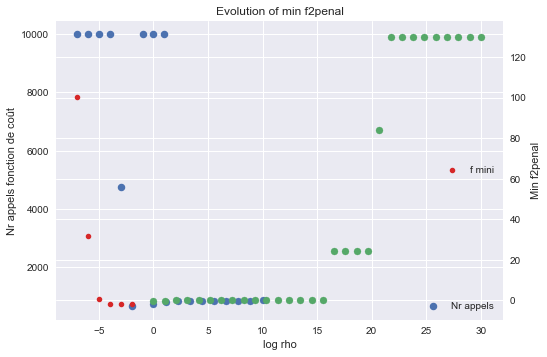

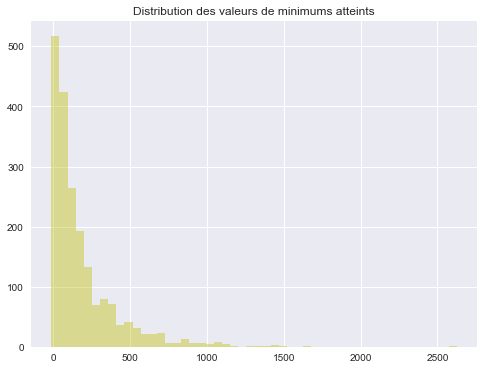

In [25]:
# Stockage des outputs
minimums = []

for params_set in params_BFGS:
    output = minimize(**params_set)
    minimums += [f3(output.x)]

#Graphique
plt.figure(figsize=(8,6))
sns.distplot(minimums, color = 'y', kde=False)
plt.title("Distribution des valeurs de minimums atteints")
plt.show()

In [26]:
print("Plus petit minimum atteint : ", np.min(minimums))

Plus petit minimum atteint :  -10.797900769519412


On constate que le point de convergence varie beaucoup en fonction du point d'initialisation, avec un mininum hypothétiquement global de -10.7979. Nous pourrions alors nous contenter d'optimiser $f_{3}$ depuis un grand nombre de point d'initialisation aléatoire et considérer que le minimum le plus récurrent est global, mais ce serait trop coûteux.

_c)_

En python, nous utilisons `basinhopping` de la librairie `scipy.optimize` pour le recuit simulé selon le principe de Metropolis.

On réalise une recherche de type GridSearch sur le paramètre de décroissance de la température, le nombre de transformation par palier et la taille du pas.

In [27]:
range_T = [1, 10, 50, 100, 200]
range_niter = [10, 25, 50]
range_stepsize = [0.1, 1]

In [28]:
minimums = {}

for T in range_T:
    for niter in range_niter:
        for stepsize in range_stepsize:
            points_init = [2*np.random.randn(5) for i in range(20)]
            params_anneal = [{'func': f3,
                             'x0': x0,
                             'minimizer_kwargs': {"method": "L-BFGS-B"},
                             'stepsize': stepsize,
                             'niter': niter,
                             'T':T} for x0 in points_init]
            for params_set in params_anneal:
                output = basinhopping(**params_set)
                min_reached = round(f3(output.x),3)
                if min_reached in minimums.keys():
                    minimums[min_reached].append((T, niter, stepsize, output.x))
                else:
                    minimums[min_reached] = [(T, niter, stepsize, output.x)]

/Users/dieze/anaconda/lib/python3.6/site-packages/scipy/optimize/_basinhopping.py:299: RuntimeWarning: overflow encountered in exp
  w = min(1.0, np.exp(-(energy_new - energy_old) * self.beta))


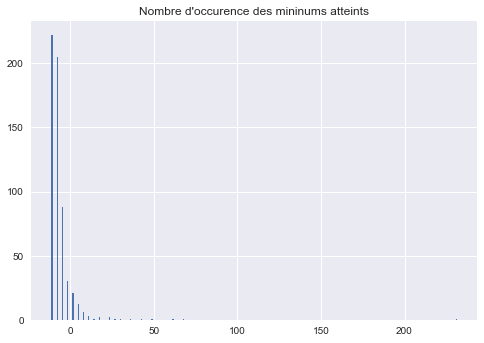

In [29]:
plt.bar(list(minimums.keys()), [len(minimums[key]) for key in minimums.keys() ])
plt.title("Nombre d'occurence des mininums atteints")
plt.show()

On constate qu'on obtient une distribution des minimums bien plus dense autour des plus petites valeurs de minimums obtenues, le plus petit minimum culminant à 10.798

- Pour de faibles températures initiales, l’exploration ne se fait pas sur assez de zones et on tend à converger vers des minimums locaux. De même, si $T_{initial}$ trop élevé, l'exploration est trop dispersée et on ne termine pas nécessairement par converger vers notre minimum global. Un bon compromis semble être une température autour de 50/75 et environ 25 transformations par palier.

- On note également que les points de convergences varient bien que le minimum atteint soit le même : il y a plusieurs minimums globaux

### 1.4 APPLICATION SYNTHESE D'UN FILTRE À RÉPONSE IMPULSIONNELLE FINIE

On se place dans $\mathbb{R}^{20}$

In [36]:
n = 20
seg1 = np.linspace(0, 0.1, 1000)
seg2 = np.linspace(0.15, 0.5, 3200)
seg = np.concatenate([seg1, seg2])

_1)_

On commence par essayer de minimiser $J$ selon une routine de Newton

In [37]:
np.random.seed(11)
h0 = np.random.randn(n)
params = {'fun': J,
          'x0': h0,
          'args': (seg, n),
          'method': 'BFGS',
          'tol': 1e-6}

In [38]:
output = minimize(**params)

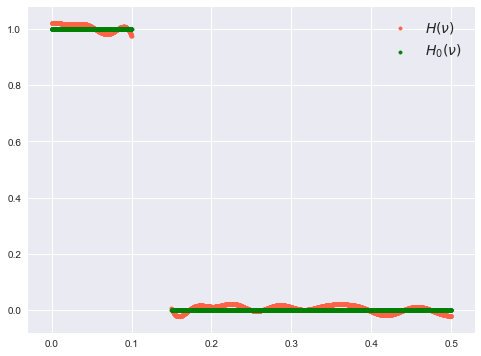

In [39]:
H0_seg = [H0(nu) for nu in seg]
H_seg = [H(nu, output.x, n) for nu in seg]

plt.figure(figsize=(8,6))
plt.scatter(seg, H_seg, marker='.', color='tomato', label=r"$H(\nu)$")
plt.scatter(seg, H0_seg, marker='.', color='green', label=r"$H_{0}(\nu)$")
plt.legend(fontsize=14)
plt.show()

_2)_

Pour cette partie, on peut transformer notre problème en un problème linéaire plus facile à résoudre

$$ \begin{array}{c}
     \underset{(h,\gamma)}{\min} :\gamma\ \\\
  sc : { H(v_{j}) \le\ H_{0}(v_{j}) + \gamma\ } \\\
    \end{array}
$$